# Regression California Housing Prices from Kaggle.

[Housing dataset from Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download)

The goal is to Create a Regression model for predicting housing prices (column "median_house_value")

In [397]:
# import libraries:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# EDA (Exploratory Data Analysis)

In [398]:
# Data Loading:
df = pd.read_csv('./data/housing.csv')
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


Now let's take a look at the Distribution of the Target Variable (median_house_value):

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

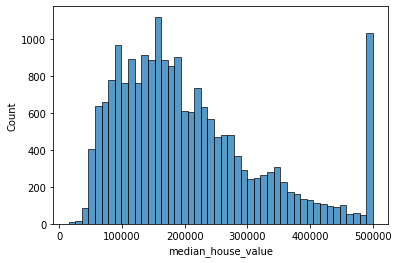

In [399]:
# distribution plot by Histogram:
sns.histplot(df.median_house_value)

We can see that there are many houses with high prices and second peak on the Maximum price around 500 thousand dollars  

We may also try to transform the Target variable by using Log transformation

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

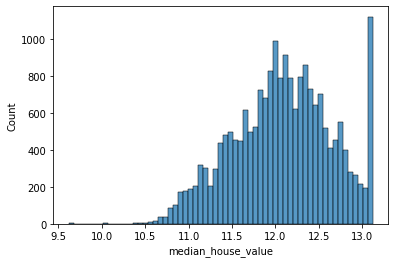

In [400]:
# to eliminate problems with log(0) errors we use log1p function, which adds 1 to each observation
sns.histplot(np.log1p(df.median_house_value))

Now the distribution look closer to the Normal (Bell Curve), except low values in the left part of the Plot

# Features

In this project we will consider only the following variables:  
- latitude
- longitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- median_house_value (Target)

In [401]:
# select required parameters:
df = df[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]]

df_initial = df.copy()
df.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


## Question 1:  
What feature has missing values? How many missing values does it have?

In [402]:
# looking at number of missing values by columns:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [403]:
# feature "total_bedrooms" has missing values
features_with_missing_values = list(df.isnull().sum()[df.isnull().sum() != 0].index)
number_of_missing_values = list(df.isnull().sum()[df.isnull().sum() != 0].values)

print(f'Features with missing values are: {features_with_missing_values}')
print(f'Number of missing values are: {number_of_missing_values}')

Features with missing values are: ['total_bedrooms']
Number of missing values are: [207]


## Question 2:  
What is the median (50% percentile) for "population" variable?

In [404]:
# find median value for population column:
answer = df.population.median()
print(f'Median value for population variable = {answer}')

Median value for population variable = 1166.0


# Data Splitting

- We will shuffle the initial dataset, using random seed = 42 (for reproducible results)
- Then Split the data into train-validation and test datasets by 60-20-20% proportion
- Then we will isolate Target variable
- Then apply Log1p transformation that we so above

In [405]:
# shuffle the initial data:
n = len(df)
shuffled_index = np.arange(n)
np.random.seed(42) # to make results reproducible
np.random.shuffle(shuffled_index) # shuffle index

# add shuffled_index into Initial data:
df['shuffled_index'] = shuffled_index
# order data by shuffled_index:
df = df.sort_values(by='shuffled_index', ascending=True)
# drop shuffled index additional column:
df = df.drop(columns = ['shuffled_index'])
# reset index of dataframe:
df = df.reset_index(drop=True)

In [406]:
df.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,34.14,-118.19,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0
1,32.91,-117.13,16.0,3230.0,579.0,1825.0,576.0,4.2969,151200.0
2,33.81,-117.95,33.0,1724.0,291.0,943.0,285.0,5.1180,195200.0


In [407]:
df_initial.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


In [408]:
# calculate number of records in each subsets:
n = len(df)

val_part = int(n * 0.2)
test_part = int(n * 0.2)
train_part = n - (val_part + test_part)

print(f'total number of records = {n}')
print(f'train_part = {train_part}, val_part = {val_part}, test_part = {test_part}')
print(f'sum of train + val + test = {train_part + val_part + test_part}')

total number of records = 20640
train_part = 12384, val_part = 4128, test_part = 4128
sum of train + val + test = 20640


In [409]:
# split data into train, validation and test datasets:
df_train = df.iloc[ : train_part]
df_val = df.iloc[train_part : (train_part + val_part)]
df_test = df.iloc[(train_part + val_part) : ]

print(f'length df_train = {len(df_train)}')
print(f'length df_val = {len(df_val)}')
print(f'length df_test = {len(df_test)}')

length df_train = 12384
length df_val = 4128
length df_test = 4128


In [410]:
# separate features from target variable:
df_train_features = df_train.drop(columns = ['median_house_value'])
df_val_features = df_val.drop(columns = ['median_house_value'])
df_test_features = df_test.drop(columns = ['median_house_value'])

y_train = np.array(df_train['median_house_value'])
y_val = np.array(df_val['median_house_value'])
y_test = np.array(df_test['median_house_value'])

In [411]:
# apply log1p transformation to y:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

## Question 3:  
We need to deal with missing values in total_bedrooms feature.  
We can fill missing values with:
- 0 or
- mean or median value in this variable (train dataset)  

Let's try Both options: 
- train a linear regression model without regularization,
- use validation data to evaluate model's performance and compare RMSE (root mean squared error) for each option

In [412]:
# function to prepare dataset Matrix (fillna(0)):
def prepare_X_fill_0(df):
    df = df.copy()
    df = df.fillna(0) # fill with 0
    X = df.values
    return X

def prepare_X_fill_mean(df):
    df = df.copy()
    mean_bedrooms = df['total_bedrooms'].mean() # mean value for column
    df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_bedrooms) # fill with mean value
    X = df.values
    return X

def prepare_X_fill_median(df):
    df = df.copy()
    median_bedrooms = df['total_bedrooms'].median() # median value for column
    df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms) # fill empty values with median
    X = df.values
    return X

In [413]:
# function to train the Linear Regression model (calculating weights):
def linear_regression_fit(x_train, y_train):
    ones = np.ones(x_train.shape[0]) # create array with `1` to add into bias term feature
    x_train = np.column_stack([ones, x_train]) # add 1st column of 1 into feature matrix

    # solve Matrix equation for finding coefficients of linear regression:
    XTX = x_train.T.dot(x_train) # Gram matrix
    XTX_inv = np.linalg.inv(XTX) # Inverse of Gram matrix
    # calc coefficients:
    #w_full = x_train.T.dot(XTX_inv).dot(y_train)
    w_full = XTX_inv.dot(x_train.T).dot(y_train)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [414]:
# function for marking predictions:
def linear_regression_predict(x_val, w0, w_array):
    y_pred = w0 + x_val.dot(w_array)
    return y_pred

In [415]:
# function to calculate RMSE:
def rmse_calc(y_pred, y_val):
    SE = (y_pred - y_val) ** 2
    MSE = SE.mean()
    RMSE = np.sqrt(MSE)
    return RMSE

In [416]:
#prepare x_train:
x_train_0 = prepare_X_fill_0(df_train_features) # dataset with 0 instead empty values:
x_train_mean = prepare_X_fill_mean(df_train_features) #dataset with mean values instead of empty:
x_train_median = prepare_X_fill_median(df_train_features) # dataset with median values instead of empty:

# prepare x_val:
x_val_0 = prepare_X_fill_0(df_val_features)
x_val_mean = prepare_X_fill_mean(df_val_features)
x_val_median = prepare_X_fill_median(df_val_features)

In [417]:
# fit models:
w0_model_0, w_model_0 = linear_regression_fit(x_train_0, y_train)# fit model with 0 instead empty values
w0_model_mean, w_model_mean = linear_regression_fit(x_train_mean, y_train)# fit model with mean values instead empty
w0_model_median, w_model_median = linear_regression_fit(x_train_median, y_train)# fil model with median values instead empty

#make predictions:
y_pred_0 = linear_regression_predict(x_val_0, w0_model_0, w_model_0)# make predictions with model_0
y_pred_mean = linear_regression_predict(x_val_mean, w0_model_mean, w_model_mean)# make pred with model_mean
y_pred_median = linear_regression_predict(x_val_median, w0_model_median, w_model_median)# make predictions with model_median

# calculate rmse:
rmse_model_0 = rmse_calc(y_pred_0, y_val)# calc RMSE for model_0
rmse_model_mean = rmse_calc(y_pred_mean, y_val)# calc RMSE for model_mean
rmse_model_median = rmse_calc(y_pred_median, y_val) # rmse for model median

print(f'RMSE score for model_0 = {round(rmse_model_0, 3)}')
print(f'RMSE score for model_mean = {round(rmse_model_mean, 3)}')
print(f'RMSE score for model_median = {round(rmse_model_median, 3)}')

RMSE score for model_0 = 0.337
RMSE score for model_mean = 0.337
RMSE score for model_median = 0.337


RMSE for all 3 options is resonably close

## Question 4:
Now we will try to improve the model performance using Regularization  
We will fill empty values with 0 for convenience, since the difference is not significant  

In [418]:
# function for Linear Regression model training with Regularization:
def linear_regression_fit_r(x_train, y_train, r=0):
    ones = np.ones(x_train.shape[0])
    x_train = np.column_stack([ones, x_train])

    XTX = x_train.T.dot(x_train)

    # create I matrix:
    I_matrix = np.eye(XTX.shape[0])
    # multiply I matrix on r value:
    reg_matrix = I_matrix * r
    # add regularization matrix to Gram matrix:
    XTX = XTX + reg_matrix
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(x_train.T).dot(y_train)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

Now let's try different Regularization parameter and measure Model performance:

In [419]:
# list of r to check:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

x_train = prepare_X_fill_0(df_train_features) # fill empty values with 0
x_val = prepare_X_fill_0(df_val_features)

# for each of options of Regularization parameter
for r in r_list:
    #train model:
    w0, w = linear_regression_fit_r(x_train, y_train, r = r)
    # make prediction
    y_pred = linear_regression_predict(x_val, w0, w)
    # calc rmse:
    rmse_score = rmse_calc(y_pred, y_val)
    print(f'For r = {r}, RMSE_score = {round(rmse_score, 2)}')

For r = 0, RMSE_score = 0.34
For r = 1e-06, RMSE_score = 0.34
For r = 0.0001, RMSE_score = 0.34
For r = 0.001, RMSE_score = 0.34
For r = 0.01, RMSE_score = 0.34
For r = 0.1, RMSE_score = 0.34
For r = 1, RMSE_score = 0.34
For r = 5, RMSE_score = 0.35
For r = 10, RMSE_score = 0.35


Regularization does not give obvious results in our case, Smallest r with same RMSE is 0

## Question 5

We used random seed = 42 for reproducible results  
Now let's find out how selection splitting of the data influence the model performance:  
- we will try different random seeds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
- for each random seed, we will train the model without Regularization, make predictions and calculate RMSE
- then we will calculate Standard Deviation (SD) for RMSE scores on different random seeds, by SD we will guess how stable our model is

In [420]:
def ML_life_cycle(df, random_seed):

    # shuffle:
    df = df.copy()
    n = len(df)
    shuffled_index = np.arange(n)
    np.random.seed(random_seed)
    np.random.shuffle(shuffled_index)

    df['shuffled_index'] = shuffled_index
    df = df.sort_values(by='shuffled_index', ascending=True)
    df = df.drop(columns = ['shuffled_index'])
    df = df.reset_index(drop=True)

    # splitting:
    n = len(df)
    val_part = int(n * 0.2)
    test_part = int(n * 0.2)
    train_part = n - (val_part + test_part)
    df_train = df.iloc[ : train_part]
    df_val = df.iloc[train_part : (train_part + val_part)]
    df_test = df.iloc[(train_part + val_part) : ]
    
    # separate features from target variable:
    df_train_features = df_train.drop(columns = ['median_house_value'])
    df_val_features = df_val.drop(columns = ['median_house_value'])
    df_test_features = df_test.drop(columns = ['median_house_value'])
    y_train = np.array(df_train['median_house_value'])
    y_val = np.array(df_val['median_house_value'])
    y_test = np.array(df_test['median_house_value'])
    # apply log1p transformation to y:
    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)

    x_train = prepare_X_fill_0(df_train_features)
    x_val = prepare_X_fill_0(df_val_features)
    w0, w = linear_regression_fit(x_train, y_train) # train model
    y_pred = linear_regression_predict(x_val, w0, w) # make predictions
    rmse_score = rmse_calc(y_pred, y_val) # rmse calculation
    return rmse_score

In [421]:
rmse_scores_list = []
random_seeds_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in random_seeds_list:
    rmse_score = ML_life_cycle(df_initial, seed)
    rmse_scores_list.append(rmse_score)

    print(f'Rand Seed = {seed}, RMSE = {rmse_score}')

Rand Seed = 0, RMSE = 0.3365724771962156
Rand Seed = 1, RMSE = 0.3384915167198516
Rand Seed = 2, RMSE = 0.34182215082784256
Rand Seed = 3, RMSE = 0.3394404545554099
Rand Seed = 4, RMSE = 0.33612008008997896
Rand Seed = 5, RMSE = 0.3392376355765129
Rand Seed = 6, RMSE = 0.3518973342019449
Rand Seed = 7, RMSE = 0.34863687683842615
Rand Seed = 8, RMSE = 0.343553569169414
Rand Seed = 9, RMSE = 0.3384608743807405


In [422]:
# calculate Standard Deviation of rmse scores for different data splitting:
round(np.std(rmse_scores_list), 3)

0.005

## Question 6

Now, we ready to Test model on the Test dataset, for that we will:
- split the data as before, using random seed = 9
- combine train and validation datasets
- fill empty values with 0 and
- train model using Regularization = 0.001
- and then test model on Test data

In [431]:
# shuffle:
df = df_initial.copy()
n = len(df)
shuffled_index = np.arange(n)
np.random.seed(9)
np.random.shuffle(shuffled_index)

df['shuffled_index'] = shuffled_index
df = df.sort_values(by='shuffled_index', ascending=True)
df = df.drop(columns = ['shuffled_index'])
df = df.reset_index(drop=True)

# splitting:
n = len(df)
val_part = int(n * 0.2)
test_part = int(n * 0.2)
train_part = n - (val_part + test_part)
df_train = df.iloc[ : train_part]
df_val = df.iloc[train_part : (train_part + val_part)]
df_test = df.iloc[(train_part + val_part) : ]
    
# separate features from target variable:
df_train_features = df_train.drop(columns = ['median_house_value'])
df_val_features = df_val.drop(columns = ['median_house_value'])
df_test_features = df_test.drop(columns = ['median_house_value'])
y_train = np.array(df_train['median_house_value'])
y_val = np.array(df_val['median_house_value'])
y_test = np.array(df_test['median_house_value'])
# apply log1p transformation to y:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

# combine train and validation data:
df_train_val = pd.concat([df_train_features, df_val_features])
y_train_val = np.concatenate([y_train, y_val])

x_train_val = prepare_X_fill_0(df_train_val)
x_test = prepare_X_fill_0(df_test_features)
w0, w = linear_regression_fit_r(x_train_val, y_train_val, r=0.001) # train model
y_pred = linear_regression_predict(x_test, w0, w) # make predictions
rmse_score = rmse_calc(y_pred, y_test) # rmse calculation
print(f'RMSE on Test data = {round(rmse_score, 2)}')

RMSE on Test data = 0.34
